In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=16, n_features=2,
n_informative=2, n_redundant=0,
random_state=10)

In [2]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)


In [3]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T,
columns=["f", "y_hat", "y"])
#f값을 내림차순으로 정렬
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.471816,1.0,1.0
1,2.100107,1.0,1.0
2,1.465129,1.0,1.0
3,1.293446,1.0,1.0
4,1.285234,1.0,0.0
5,0.908117,1.0,1.0
6,0.901632,1.0,1.0
7,0.164087,1.0,1.0
8,-0.647279,0.0,0.0
9,-0.735501,0.0,0.0


In [4]:
#0을 기준으로 계산한 결과
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_hat, labels=[0,1])
# 윗줄FPR, 아래줄TPR

array([[7, 1],
       [1, 7]], dtype=int64)

In [5]:
# 0을 기준으로 계산한 결과
tpr0 = 7 / (7 + 1)
fpr0 = 1 / (1 + 7)
print(tpr0)
print(fpr0)

0.875
0.125


In [6]:
# 판별함수의 출력값에 따라 판별기준을 바꾸어 계산한 fpr,tpr
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, model.decision_function
(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.4718164 ,  2.4718164 ,  1.29344604,  1.28523411,  0.16408684,
        -0.9956665 , -1.03203074, -2.9451636 ]))

In [10]:
model.predict_proba(X) # 0일 확률, 1일 확률

array([[0.18768412, 0.81231588],
       [0.73730941, 0.26269059],
       [0.67601135, 0.32398865],
       [0.28871519, 0.71128481],
       [0.28738529, 0.71261471],
       [0.75192827, 0.24807173],
       [0.21666058, 0.78333942],
       [0.95003441, 0.04996559],
       [0.2152701 , 0.7847299 ],
       [0.10908639, 0.89091361],
       [0.07785772, 0.92214228],
       [0.89090921, 0.10909079],
       [0.45907008, 0.54092992],
       [0.76545911, 0.23454089],
       [0.656397  , 0.343603  ],
       [0.73020571, 0.26979429]])

In [8]:
# 판별함수가 제공되지 않는 모형은 predict_proba() 함수를 사용할 수 있음
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)
[:, 1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([1.92214228, 0.92214228, 0.7847299 , 0.78333942, 0.54092992,
        0.26979429, 0.26269059, 0.04996559]))

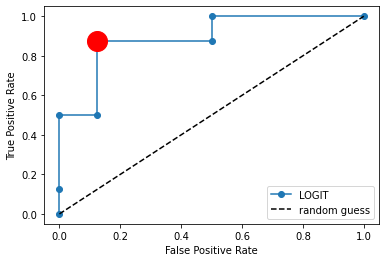

In [9]:

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'o-', label="LOGIT")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr0], [tpr0], 'ro', ms=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()